<a href="https://colab.research.google.com/github/Tanveer132/Neural-Network/blob/main/FST_LSTM_RNN_on_airline_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perform LSTM on airline passengers data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from keras.layers import LSTM
from keras.layers import Dense
from keras import Sequential

##Import data, split and scale

In [2]:
df=pd.read_csv('/content/international-airline-passengers.csv')
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [4]:
data=df[['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']]
data.head(),data.tail()

(   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
 0                                              112.0                             
 1                                              118.0                             
 2                                              132.0                             
 3                                              129.0                             
 4                                              121.0                             ,
      International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
 140                                              508.0                             
 141                                              461.0                             
 142                                              390.0                             
 143                                              432.0                             
 144                                                NaN                     

In [5]:
train=data.iloc[:121,:]
test=data.iloc[121:,:]

In [6]:
scaler=StandardScaler()
sc_train=scaler.fit_transform(train)
sc_test=scaler.fit_transform(test)


##Define functions to prepare data for LSTM

In [7]:
def featureTransform(n_steps,data):
  x=[]
  y=[]
  for i in range(n_steps,len(data)):
    x.append(data[i-n_steps:i,0])
    y.append(data[i,0])
  x,y=np.array(x),np.array(y)
  return x,y

In [8]:
n_steps=12

xtrain,ytrain=featureTransform(n_steps,sc_train)

xtrain.shape,ytrain.shape

((109, 12), (109,))

In [9]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)

xtrain.shape

(109, 12, 1)

##Build and fit model

In [10]:
#build model
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [11]:
history=model.fit(xtrain,ytrain,epochs=100,batch_size=30,verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 40ms/step - loss: 0.7942
Epoch 2/100
4/4 [==============================] - 0s 39ms/step - loss: 0.6164
Epoch 3/100
4/4 [==============================] - 0s 32ms/step - loss: 0.3649
Epoch 4/100
4/4 [==============================] - 0s 31ms/step - loss: 0.2455
Epoch 5/100
4/4 [==============================] - 0s 33ms/step - loss: 0.1958
Epoch 6/100
4/4 [==============================] - 0s 32ms/step - loss: 0.2019
Epoch 7/100
4/4 [==============================] - 0s 35ms/step - loss: 0.1765
Epoch 8/100
4/4 [==============================] - 0s 30ms/step - loss: 0.1815
Epoch 9/100
4/4 [==============================] - 0s 35ms/step - loss: 0.1653
Epoch 10/100
4/4 [==============================] - 0s 31ms/step - loss: 0.1437
Epoch 11/100
4/4 [==============================] - 0s 32ms/step - loss: 0.1397
Epoch 12/100
4/4 [==============================] - 0s 29ms/step - loss: 0.1290
Epoch 13/100
4/4 [==============================]

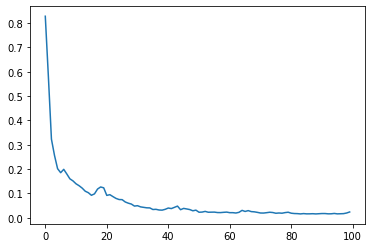

In [12]:
plt.plot(history.history['loss'])

##Prepare test data and predict

In [13]:
xtest,ytest=featureTransform(12,sc_test)


In [14]:
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

xtest.shape

(12, 12, 1)

In [15]:
ypred=model.predict(xtest)
predictions=scaler.inverse_transform(ypred)
predictions=predictions[:10]

In [16]:
actual=scaler.inverse_transform(ytest.reshape(-1,1))
actual=actual[:10]

In [17]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(actual,predictions)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

808.0005361813121
28.425350238498595
